In [13]:
! pip install pygame

In [191]:
#Imports
import numpy as np
from midi import *
from midiutil import MIDIFile
import matplotlib.pyplot as plt

In [360]:
# CONSTANTS
L = 16 # length of measure
bpm = 400 # bpm

In [358]:
# Function which chooses a rule according to the probs
def choose_rule():
    p1 = 0.7
    p2 = 0.3
    p3 = 0
    
    choice = np.random.random()
    
    if(choice < p1):
        return 1
    if(choice < p1+p2):
        return 2
    if(choice < p1+p2+p3):
        return 3

In [370]:
# Rhythm generation
def generate_rhythm(size, volume):
    rhythm = np.zeros(size)
    
    # End case (else infinite recursion)
    if(size == 1):
        rhythm[0] = 255
        return rhythm
    
    # Recursion
    rule = choose_rule()
    
    if (rule == 1):
        rhythm = np.append( generate_rhythm(int(size/2), volume*1) , generate_rhythm(int(size/2), volume*0.98) )    
    if (rule == 2):
        rhythm[0] = volume   
    return rhythm

# Tempo generation
def generate_tempo(size):   
    tempo = np.zeros(size)
    tempo[0:-1:4] = 255    
    return tempo

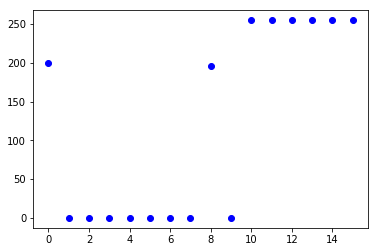

In [371]:
#Generate the audio beat and play it
rhythm = generate_rhythm(L, 200)
plt.plot(rhythm, 'bo')
plt.show()

degree   = 60   # pitch
track    = 0
channel  = 0
time     = 1    # In beats
duration = 1    # In beats
tempo    = bpm  # In BPM
volumes  = rhythm.astype(int).tolist()  # 0-127, as per the MIDI standard
tempos   = generate_tempo(L).astype(int).tolist()

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created automatically)
MyMIDI.addTempo(track, time, tempo)

# Rhythm
MyMIDI.addProgramChange(tracknum=0, channel=0, time=0, program = 115)
for i, volume in enumerate(volumes):
    MyMIDI.addNote(track=0, channel=0, pitch=50, time=time + i, duration=duration, volume=volume)
    
# Tempo
MyMIDI.addProgramChange(tracknum=0, channel=1, time=0, program = 115)    
for i, tempo in enumerate(tempos):
    MyMIDI.addNote(track=0, channel=1, pitch=90, time=time + i, duration=duration, volume=tempo)

with open("test.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

play_music("test.mid")